In [396]:
import pandas as pd
import numpy as np
import sklearn
from tqdm import tqdm

In [397]:
import random
random.seed(1024)

In [398]:
df = pd.read_csv("Citadel-Datathon-2021/mode1data_pcaed_knn.csv")
#df.head()
df_cols = list(df.columns)
'''
['edu',
 'employ',
 'LogGDPPerCapita',
 'cbrt_income',
 'pop',
 'tax',
 'Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific',
 'pca_1',
 'pca_2',
 'pca_3',
 'Year',
 'Location',
 'Value']
'''

"\n['edu',\n 'employ',\n 'LogGDPPerCapita',\n 'cbrt_income',\n 'pop',\n 'tax',\n 'Africa',\n 'Americas',\n 'Eastern Mediterranean',\n 'Europe',\n 'South-East Asia',\n 'Western Pacific',\n 'pca_1',\n 'pca_2',\n 'pca_3',\n 'Year',\n 'Location',\n 'Value']\n"

In [399]:
# preprocess, including time info

# world average for a year-ok
# world std for a year-ok
# location progression rate 2018-2017 => del
# progression pct = (current - base) / base => features_2013 == 0
# world progression rate 2018-2017-ok => del
# location 2018 / world 2018 (std) progression..?



# IGNORE ABOVE




# location annual progression - world annual (mean) progression from 2013 to 2018


df_ww_annual_avg = df.groupby(["Year"]).mean()
df_ww_annual_std = df.groupby(["Year"]).std()

def getProgress(dff,cols,years):
    d = dict()
    d["Year"] = list(years)
    for col in cols:
        res = [0] # init 2013
        L = list(dff[col])
        for i in range(1,len(L)):
            if L[i-1] == 0: 
                res.append(0)
            else:
                res.append((L[i] - L[i-1]) / L[i-1]) 
        d[col+"_prog"] = res
    return pd.DataFrame(d)

def vsWorld(countries,df_ww,dfs_country):
    L = []
    for i in range(len(countries)):
        d = dict()
        d["Location"] = np.repeat(countries[i],len(range(2013,2019)))
        d["Year"] = range(2013,2019)
        df_country = dfs_country[i]
        for X in numeric_cols:
            d[X+"_relprog"] = (df_country[X+"_prog"] - df_ww[X+"_prog"])
        L.append(pd.DataFrame(d))
    return pd.concat(L)
                   
    

numeric_cols = df_cols[:6]+df_cols[12:15]
df_ww_annual_progress = getProgress(df_ww_annual_avg,numeric_cols,df_ww_annual_avg.index)
df_count = df.groupby(["Location","Year"]).sum()
countries = df["Location"].unique()
dfs_country = [getProgress(df_count.loc[(c,)],numeric_cols,range(2013,2019)) for c in countries]
df_all = df.merge(vsWorld(countries, df_ww_annual_progress,dfs_country),how="left") 

#df_all.head()
#df_all.to_csv("with_prog.csv",index=False)

In [400]:
print(df_all.columns)

'''X_m2 = df_all.drop(['Value', 'Year','Location','edu','employ','LogGDPPerCapita','cbrt_income','pop',
                   'tax','pca_1','pca_2','pca_3','Africa','Americas','Eastern Mediterranean','Europe'
                   ,'South-East Asia','Western Pacific'], axis=1)
y_m2 = df_all["Value"]'''

X_m2 = df_all.drop(['Location'], axis=1)
X_m2 = X_m2.drop(X_m2[X_m2['Year'] == 2013].index)
X_m2 = X_m2.drop(['Year'], axis=1)
y_m2 = X_m2["Value"]

X_m2 = X_m2.drop(['Value'], axis=1)
X_m2

Index(['edu', 'employ', 'LogGDPPerCapita', 'cbrt_income', 'pop', 'tax',
       'Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific', 'pca_1', 'pca_2', 'pca_3', 'Year',
       'Location', 'Value', 'edu_relprog', 'employ_relprog',
       'LogGDPPerCapita_relprog', 'cbrt_income_relprog', 'pop_relprog',
       'tax_relprog', 'pca_1_relprog', 'pca_2_relprog', 'pca_3_relprog'],
      dtype='object')


,edu,employ,LogGDPPerCapita,cbrt_income,pop,tax,Africa,Americas,Eastern Mediterranean,Europe,...,pca_3,edu_relprog,employ_relprog,LogGDPPerCapita_relprog,cbrt_income_relprog,pop_relprog,tax_relprog,pca_1_relprog,pca_2_relprog,pca_3_relprog
0,0.380410,0.334987,0.270559,0.242478,0.000809,0.699617,1.0,0.0,0.0,0.0,...,0.089063,-0.052528,-0.026336,-0.007306,0.000911,0.001340,-0.030000,-3.497758,0.279230,-1.226833
1,0.439886,0.473300,0.609880,0.314333,0.004696,0.567468,0.0,1.0,0.0,0.0,...,-0.123395,-0.153616,-0.247464,0.018891,0.007110,-0.622439,0.019641,-3.427684,0.893463,-1.493771
2,0.447146,0.492851,0.538822,0.296962,0.002100,0.765212,0.0,1.0,0.0,0.0,...,-0.124882,0.003377,-0.005175,0.058006,-0.001760,-0.004135,-0.018178,-4.373379,-1.458675,-8.185068
3,0.026791,0.507733,0.145309,0.064277,0.011106,0.438730,1.0,0.0,0.0,0.0,...,-0.357955,-0.116097,-0.184943,-0.016829,0.108194,0.021771,-0.030000,-3.359015,1.197510,-0.896418
4,0.028383,0.603443,0.341118,0.148248,0.036894,0.428837,1.0,0.0,0.0,0.0,...,-0.012144,-0.228508,-0.026336,0.015435,0.037562,0.014383,-0.074104,-3.409979,0.005045,-1.292293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0.148867,0.730741,0.168064,0.142697,0.007567,0.419030,0.0,1.0,0.0,0.0,...,0.061239,0.000077,-0.021600,-0.002138,-0.003896,0.083241,-0.006317,1.208679,0.153612,0.102903
741,0.533135,0.566093,0.581038,0.346589,0.033716,0.327070,0.0,1.0,0.0,0.0,...,-0.016324,-0.014353,-0.009866,-0.006002,-0.007322,0.079123,0.059230,0.971422,-0.781544,-0.847788
742,0.151136,0.729939,0.150898,0.051928,0.003123,0.436998,1.0,0.0,0.0,0.0,...,-0.092303,-0.429545,2.118030,0.187922,-0.061455,0.095196,-0.466026,0.749153,-24.694973,-0.832761
743,0.279363,0.658302,0.296407,0.137996,0.016279,0.299739,1.0,0.0,0.0,0.0,...,0.160274,0.110539,0.376602,0.002799,0.042885,0.096361,0.067057,1.018801,-0.706856,1.267302


In [312]:
np.random.get_state()[1][3]

3570887495

In [401]:
# lasso
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_m2_train, X_m2_test,y_m2_train, y_m2_test = train_test_split(X_m2, y_m2, test_size =0.2, random_state = 123445) # with 2013, random_state = 42, alhpa = 0.001
m2 = linear_model.Lasso(alpha=0.01,max_iter=100000,tol=1e-1)

In [381]:
m2.fit(X_m2_train, y_m2_train)
R2_train = m2.score(X_m2_train, y_m2_train)
R2_test = m2.score(X_m2_test, y_m2_test)
n_train,p = X_m2_train.shape
n_test,_ = X_m2_test.shape
print("Training r-square:", m2.score(X_m2_train, y_m2_train))
print("Adjusted Training r-square:", 1-(1-R2_train)*(n_train-1)/(n_train-p-1))
print("Testing r-square:", m2.score(X_m2_test, y_m2_test))
print("Adjusted Testing r-square:", 1-(1-R2_test)*(n_test-1)/(n_test-p-1))

Training r-square: 0.06104963701891608
Adjusted Training r-square: 0.0490630366404341
Testing r-square: -0.02072373984970244
Adjusted Testing r-square: -0.0750818088357812


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34165.7488529824, tolerance: 7531.401071328672
  positive)


In [406]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=20, random_state=123445)
rf_regr.fit(X_m2_train, y_m2_train)
R2_train_rf = rf_regr.score(X_m2_train, y_m2_train)
R2_test_rf = rf_regr.score(X_m2_test, y_m2_test)
print("Training r-square:", rf_regr.score(X_m2_train, y_m2_train))
print("Adjusted Training r-square:", 1-(1-R2_train_rf)*(n_train-1)/(n_train-p-1))
print("Testing r-square:", rf_regr.score(X_m2_test, y_m2_test))
print("Adjusted Testing r-square:", 1-(1-R2_test_rf)*(n_test-1)/(n_test-p-1))

Training r-square: 0.9772561761789242
Adjusted Training r-square: 0.9769658294918466
Testing r-square: 0.8516959123634795
Adjusted Testing r-square: 0.8437980615425997


In [407]:
importances = rf_regr.feature_importances_

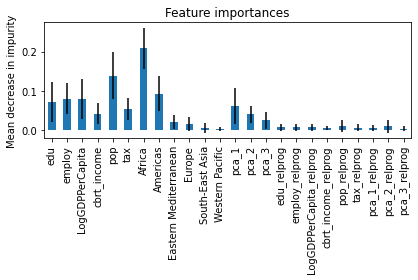

In [405]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=X_m2.columns)
std = np.std([tree.feature_importances_ for tree in rf_regr.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()